In [1]:
pwd

'/home/avani/Desktop/IBM/src/dataset_div'

In [2]:
cd ..

/home/avani/Desktop/IBM/src


In [3]:
from utils import calc_third_quartile, get_unique_act, get_compliant_cases, plot_case_occ 
import numpy as np
import os
import pickle
import pandas as pd
import random
from statistics import mean, median

In [4]:
env_name = "traffic_ss"
df2 = pd.read_pickle('dataset/preprocessed/'+env_name+'_design_mat.pkl')

In [5]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,duration_time,remaining_time,class,CaseID
0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,740.958333,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,118.958333,622.000000,2,1
2,0,0,0,1,0,0,0,0,0,0,0,0,16.000000,606.000000,3,1
3,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,546.000000,4,1
4,0,0,0,0,0,1,0,0,0,0,0,0,546.000000,0.000000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56383,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,15037
56384,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,442.041667,2,15037
56385,0,0,0,1,0,0,0,0,0,0,0,0,6.041667,436.000000,3,15037
56386,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,376.000000,4,15037


In [6]:
# get process flow compliance cases only
df = get_compliant_cases(df2,env_name) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,duration_time,remaining_time,class,CaseID
0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,740.958333,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,118.958333,622.000000,2,1
2,0,0,0,1,0,0,0,0,0,0,0,0,16.000000,606.000000,3,1
3,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,546.000000,4,1
4,0,0,0,0,0,1,0,0,0,0,0,0,546.000000,0.000000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56383,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,15037
56384,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,442.041667,2,15037
56385,0,0,0,1,0,0,0,0,0,0,0,0,6.041667,436.000000,3,15037
56386,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,376.000000,4,15037


In [7]:
caseId_lis = df["CaseID"].unique()
num_cases = len(caseId_lis)
num_cases

12571

In [8]:
import random
random.shuffle(caseId_lis)

In [9]:
train_cases_start = 0
train_cases_end = int(.65*num_cases)
val_cases_start = train_cases_end
val_cases_end = int(val_cases_start + .1*num_cases)
test_cases_start = val_cases_end 
test_cases_end = num_cases


In [10]:
cases_train = caseId_lis[train_cases_start:train_cases_end]
cases_val = caseId_lis[val_cases_start:val_cases_end]
cases_test = caseId_lis[test_cases_start:test_cases_end]

In [13]:
# df = pd.read_pickle('dataset/preprocessed/helpdesk.pkl')
dat_group = df2.groupby("CaseID")

total_iter = len(dat_group.ngroup())
case_duration_dic = {}
for name, gr in dat_group:
    case_duration_dic[name] = gr['duration_time'].sum()
    

In [12]:
max(df2['duration_time'])

3739.0416666666665

In [13]:
case_duration_dic

{1: 740.9583333333333,
 2: 971.0,
 3: 737.9583333333334,
 4: 131.95833333333334,
 5: 751.9583333333334,
 6: 751.9583333333334,
 7: 128.95833333333334,
 8: 128.95833333333334,
 9: 2.0,
 10: 749.9583333333333,
 11: 2.0,
 12: 193.95833333333331,
 13: 748.9583333333334,
 14: 754.9583333333334,
 15: 130.95833333333334,
 16: 128.95833333333334,
 17: 128.95833333333334,
 18: 3.0,
 19: 751.9583333333334,
 20: 1.0,
 21: 124.95833333333333,
 22: 3.0,
 23: 3.0,
 24: 0.0,
 25: 120.95833333333333,
 26: 2.9583333333333335,
 27: 7.0,
 28: 3.0,
 29: 723.0,
 30: 682.0,
 31: 82.0,
 32: 628.0,
 33: 123.95833333333333,
 34: 740.9583333333333,
 35: 146.0,
 36: 26.0,
 37: 108.0,
 38: 745.9583333333333,
 39: 742.9583333333333,
 40: 135.95833333333334,
 41: 113.0,
 42: 728.0,
 43: 86.0,
 44: 966.0,
 45: 127.95833333333333,
 46: 4.0,
 47: 19.958333333333332,
 48: 200.95833333333334,
 49: 6.0,
 50: 612.0,
 51: 102.04166666666667,
 52: 548.0,
 53: 528.0,
 54: 213.04166666666666,
 55: 400.0,
 56: 739.958333333333

reference for calulating quartile [here](http://web.mnstate.edu/peil/MDEV102/U4/S36/S363.html#:~:text=The%20third%20quartile%2C%20denoted%20by,25%25%20lie%20above%20Q3%20)

In [14]:
mean(case_duration_dic.values())

344.73697379796505

In [15]:
# quartile calculation 
case_durations = list(case_duration_dic.values())
third_quartile  = calc_third_quartile(case_durations)

In [16]:
third_quartile

607.0416666666667

In [17]:
cases_gs = []
cases_gv = []
for k,v in case_duration_dic.items():
    if v <= third_quartile:
        cases_gs.append(k)
    else:
        cases_gv.append(k)

In [18]:
len(cases_gs), len(cases_gv)

(11278, 3759)

In [19]:
gs_data = df.loc[df['CaseID'].isin(cases_gs)]
gv_data = df.loc[df['CaseID'].isin(cases_gv)]

In [20]:
tot = len(cases_gs)+ len(cases_gv)
percent_gs_cases = len(cases_gs) / tot
print(percent_gs_cases)

0.7500166256567135


In [21]:
df.shape, len(cases_train), len(cases_val), len(cases_test)

((43364, 16), 8171, 1257, 3143)

In [22]:
data_train = df.loc[df['CaseID'].isin(cases_train)]
data_val = df.loc[df['CaseID'].isin(cases_val)]
data_test = df.loc[df['CaseID'].isin(cases_test)]

In [23]:
name = 'dataset/preprocessed/'+env_name+'_d2'
pickle.dump(data_train, open(name+"_train_RL.pkl", "wb"))
pickle.dump(data_val, open(name+"_val_RL.pkl", "wb"))
pickle.dump(data_test, open(name+"_test_RL.pkl", "wb"))

In [24]:
data_train

,0,1,2,3,4,5,6,7,8,9,10,11,duration_time,remaining_time,class,CaseID
0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,740.958333,1,1
1,0,0,1,0,0,0,0,0,0,0,0,0,118.958333,622.000000,2,1
2,0,0,0,1,0,0,0,0,0,0,0,0,16.000000,606.000000,3,1
3,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,546.000000,4,1
4,0,0,0,0,0,1,0,0,0,0,0,0,546.000000,0.000000,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56364,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,1280.041667,1,15032
56365,0,0,1,0,0,0,0,0,0,0,0,0,58.000000,1222.041667,2,15032
56366,0,0,0,1,0,0,0,0,0,0,0,0,10.041667,1212.000000,3,15032
56367,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,1152.000000,4,15032


In [25]:
data_test

,0,1,2,3,4,5,6,7,8,9,10,11,duration_time,remaining_time,class,CaseID
10,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,737.958333,1,3
11,0,0,1,0,0,0,0,0,0,0,0,0,131.958333,606.000000,2,3
12,0,0,0,1,0,0,0,0,0,0,0,0,18.000000,588.000000,3,3
13,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,528.000000,4,3
14,0,0,0,0,0,1,0,0,0,0,0,0,528.000000,0.000000,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56383,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,15037
56384,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,442.041667,2,15037
56385,0,0,0,1,0,0,0,0,0,0,0,0,6.041667,436.000000,3,15037
56386,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,376.000000,4,15037


In [26]:
get_unique_act(data_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [27]:
get_unique_act(data_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [28]:
get_unique_act(data_val)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 11]

In [29]:
get_unique_act(df2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [30]:
get_unique_act(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [31]:
get_unique_act(gs_data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [32]:
get_unique_act(gv_data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

stats after filtering dfg compliant cases
activity   occurance
1             12571
2             7958
3             5968
4             5968
5             5709
6             4625
7             259
8             259
9             20


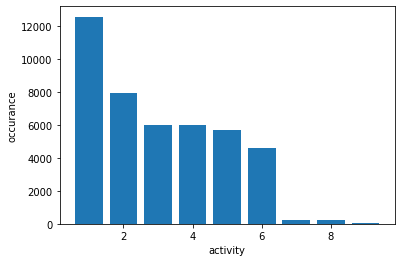

In [33]:
print("stats after filtering dfg compliant cases")
plot_case_occ(df)
  

stats initial
activity   occurance
1             15037
2             10423
3             8044
4             8044
5             5941
6             7810
7             421
8             417
9             105


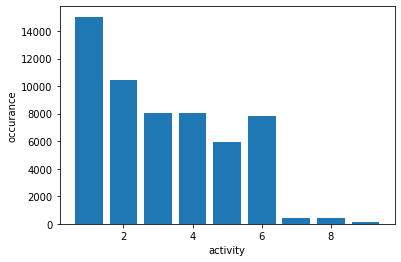

In [34]:
print("stats initial")
plot_case_occ(df2)

In [35]:
# from utils import num_occurance_atob
def num_occurance_atob(a,b,df):
    """
    find num occurance of activity a followed by activity b in dataframe df
    args: a: activity number (dtype: int)
          b: activity number (dtype: int)
          df: dataframe (pandas) where a, b occur (must have ActivityID column)
    returns: num_occurance   (dtype: int)
    """
    h = df[df["class"]==a]
    ind = list(h.index)
    oc = 0
    for i in ind:
        if i < 13709:
            next_act = int(df.iloc[i+1]["class"])
            if next_act == b:
                oc += 1
    return oc
num_occurance_atob(1,2,df2)

2567

In [44]:
act = [0, 1, 2, 3, 4, 5, 6]
for a in act:
    for b in act:
        print("{} -> {} : {} ".format(a,b,num_occurance_atob(a,b,df2)))

0 -> 0 : 0 
0 -> 1 : 0 
0 -> 2 : 0 
0 -> 3 : 0 
0 -> 4 : 0 
0 -> 5 : 0 
0 -> 6 : 0 
1 -> 0 : 0 
1 -> 1 : 329 
1 -> 2 : 4 
1 -> 3 : 639 
1 -> 4 : 0 
1 -> 5 : 0 
1 -> 6 : 0 
2 -> 0 : 0 
2 -> 1 : 10 
2 -> 2 : 34 
2 -> 3 : 6 
2 -> 4 : 0 
2 -> 5 : 0 
2 -> 6 : 7 
3 -> 0 : 0 
3 -> 1 : 181 
3 -> 2 : 3 
3 -> 3 : 3208 
3 -> 4 : 0 
3 -> 5 : 983 
3 -> 6 : 0 
4 -> 0 : 0 
4 -> 1 : 32 
4 -> 2 : 0 
4 -> 3 : 35 
4 -> 4 : 1829 
4 -> 5 : 0 
4 -> 6 : 360 
5 -> 0 : 0 
5 -> 1 : 132 
5 -> 2 : 2 
5 -> 3 : 180 
5 -> 4 : 0 
5 -> 5 : 3571 
5 -> 6 : 668 
6 -> 0 : 0 
6 -> 1 : 288 
6 -> 2 : 14 
6 -> 3 : 306 
6 -> 4 : 427 
6 -> 5 : 0 
6 -> 6 : 461 
